In [1]:
!  pip install umap-learn
!  pip install imblearn

     |████████████████████████████████| 88 kB 7.5 MB/s 
     |████████████████████████████████| 1.1 MB 58.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=3dd3af08913bad48e71a4c25c1e17bc39e3acd3d7a7ea64b1f2b00bcb8e2b1aa
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=f286dd44e4288dfb4e43da5bef771f3ee69615484121be06694aa73438bfbf05
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [2]:
from google.colab import drive
drive.mount('/content/drive')
root_dir='/content/drive/MyDrive/Colab Notebooks/'

Mounted at /content/drive


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import AllKNN
from imblearn.combine import SMOTEENN
warnings.filterwarnings('ignore')

X = pd.read_csv(root_dir+'expression-data-loi-os.csv').T
y = pd.read_csv(root_dir+'expression-survival-loi-os.csv')['status']
time = pd.read_csv(root_dir+'expression-survival-loi-os.csv')['time']

grand_data = X.copy()
grand_data['status'] = y.tolist()
grand_data['time'] = time.tolist()
grand_data

,0,1,2,3,4,5,6,7,8,9,...,13100,13101,13102,13103,13104,13105,13106,13107,status,time
NKI_4,-0.050,-0.384,0.087,0.067,-0.533,0.033,-0.093,0.049,0.232,-0.127333,...,0.069,-0.070,0.158,-0.207,0.043,0.083,-0.233,0.096,0,13.005479
NKI_6,0.125,-0.314,0.491,-0.027,0.695,0.037,0.137,0.106,-0.083,0.040667,...,-0.088,-0.011,-0.048,0.290,0.048,0.018,0.128,-0.055,0,11.164384
NKI_7,0.426,0.053,-0.771,-0.019,0.089,-0.131,0.056,0.036,-0.082,-0.023333,...,0.086,-0.173,0.059,-0.135,0.072,0.129,0.172,0.088,0,10.145205
NKI_8,-0.016,-0.035,-0.507,-0.129,0.093,0.019,-0.046,0.111,-0.103,-0.088667,...,0.000,-0.071,-0.008,-0.061,0.050,0.008,-0.151,-0.184,0,8.808219
NKI_9,0.307,-0.169,-0.537,0.098,0.166,-0.204,0.218,0.252,-0.113,-0.123333,...,0.159,-0.172,0.181,0.229,0.145,0.059,-0.099,-0.144,0,10.301370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NKI_398,-0.092,-0.455,-0.693,-0.282,-0.619,-0.024,-0.023,0.202,-0.035,-0.034333,...,-0.256,0.016,-0.694,-0.211,-0.166,-0.401,-0.219,-0.250,0,8.430137
NKI_401,0.054,-0.664,0.112,-0.112,0.597,-0.364,0.135,0.319,-0.137,0.232333,...,-0.637,-0.191,0.281,-0.042,0.329,-0.094,-0.120,-0.412,1,1.528767
NKI_402,-0.067,-0.173,-0.788,0.103,0.305,-0.010,-0.100,0.323,0.029,0.021333,...,-0.265,-0.039,-0.003,0.211,0.449,0.251,-0.356,-0.158,0,7.383562
NKI_403,0.345,-0.091,0.174,-0.041,-0.238,-0.436,0.055,0.241,-0.256,-0.162000,...,0.084,-0.184,0.183,0.027,0.233,-0.381,-0.103,-0.199,0,6.758904


In [4]:
# Apply the random over-sampling
sm = SMOTE()
ada = ADASYN()

sme = SMOTEENN()
allknn = AllKNN()
X_resampled, y_resampled = ada.fit_resample(X, y)
print(np.unique(y_resampled, return_counts=True))

(array([0, 1]), array([194, 200]))


# Dimension Reduction

In [5]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import umap

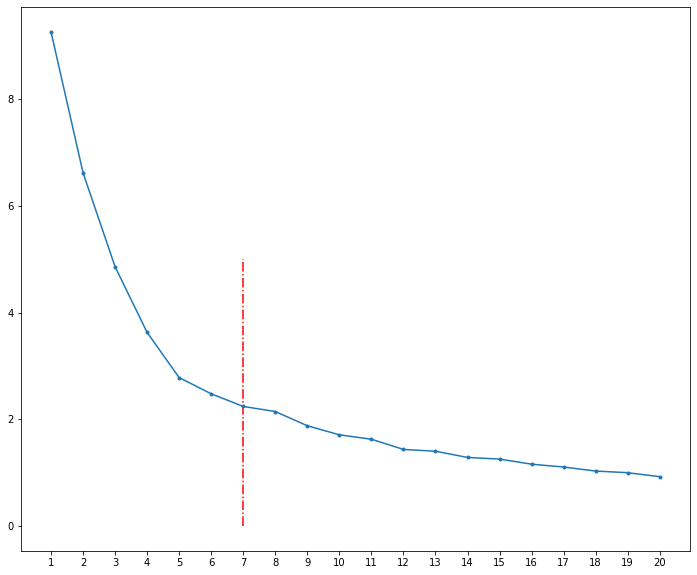

In [ ]:
pca=PCA(n_components=20)
pca.fit_transform(X)
per_ev=pca.explained_variance_ratio_*100
plt.figure(figsize=(12,10))
plt.plot(per_ev,'.-')
plt.vlines(6,0,5,colors='r',linestyles='dashdot')
plt.xticks(range(20),range(1,21))
plt.show()

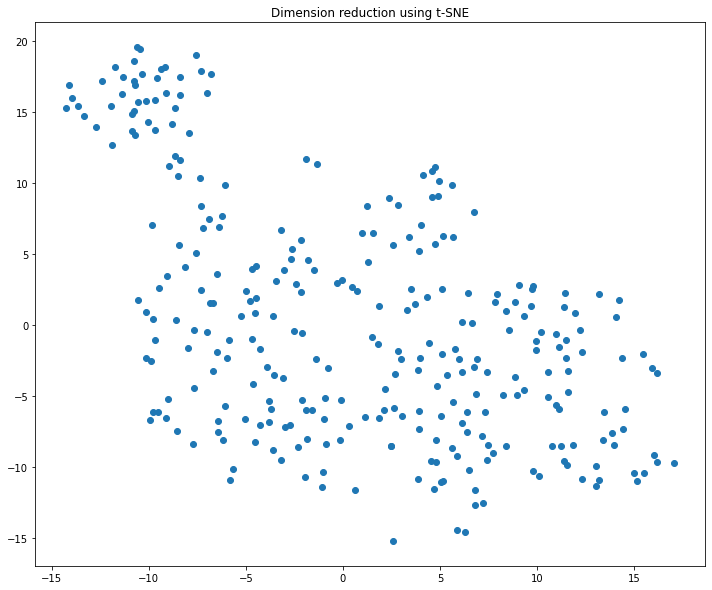

In [ ]:
pca=PCA(n_components=7)
pca_X=pca.fit_transform(X)
tsne=TSNE(n_components=2)
tsne_X=tsne.fit_transform(pca_X)
plt.figure(figsize=(12,10))
plt.scatter(tsne_X[:,0],tsne_X[:,1])
plt.title('Dimension reduction using t-SNE')
plt.show()

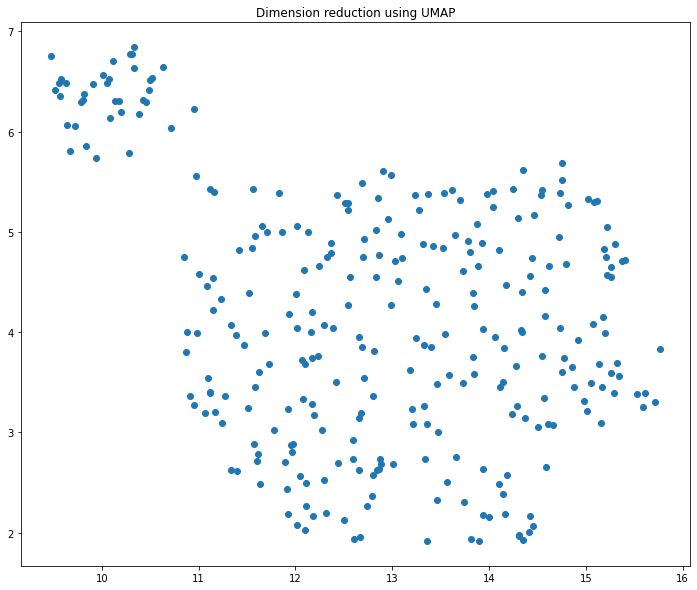

In [ ]:
reducer = umap.UMAP(n_components=2)
umap_X = reducer.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(umap_X[:,0],umap_X[:,1])
plt.title('Dimension reduction using UMAP')
plt.show()

# data split

In [16]:
from sklearn.model_selection import train_test_split

# pca=PCA(n_components=15)
# X_resampled = pca.fit_transform(X_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, shuffle=True, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((315, 13108), (79, 13108), (315,), (79,))

# RF

Fitting 5 folds for each of 10 candidates, totalling 50 fits
RF AUC:  0.9117458279845957
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        41
           1       0.90      0.92      0.91        38

    accuracy                           0.91        79
   macro avg       0.91      0.91      0.91        79
weighted avg       0.91      0.91      0.91        79



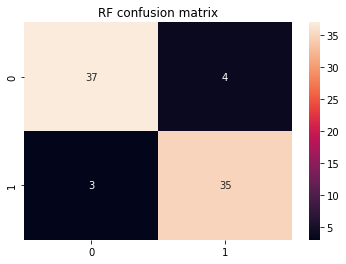

In [17]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import PredefinedSplit,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report,confusion_matrix
import seaborn as sns

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 8]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'bootstrap': bootstrap,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               verbose = 1,
                               scoring = 'f1', 
                               cv = 5, 
                               n_jobs = -1, 
                               random_state = 42)
# Fit the random search model
rf_random.fit(X_train, y_train)

new_rf = RandomForestClassifier(n_estimators = rf_random.best_params_['n_estimators'], 
                                bootstrap = rf_random.best_params_['bootstrap'],
                                min_samples_split = rf_random.best_params_['min_samples_split'],
                                min_samples_leaf = rf_random.best_params_['min_samples_leaf'],
                                max_features = rf_random.best_params_['max_features'],random_state=100)

new_rf.fit(X_train, y_train)
y_pred = new_rf.predict(X_test)
print("RF AUC: ", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[0, 1]))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)
plt.title('RF confusion matrix')
plt.show()

In [18]:
rf_predications = new_rf.predict(X)
grand_data['RF_pred'] = rf_predications
grand_data

,0,1,2,3,4,5,6,7,8,9,...,13101,13102,13103,13104,13105,13106,13107,status,time,RF_pred
NKI_4,-0.050,-0.384,0.087,0.067,-0.533,0.033,-0.093,0.049,0.232,-0.127333,...,-0.070,0.158,-0.207,0.043,0.083,-0.233,0.096,0,13.005479,0
NKI_6,0.125,-0.314,0.491,-0.027,0.695,0.037,0.137,0.106,-0.083,0.040667,...,-0.011,-0.048,0.290,0.048,0.018,0.128,-0.055,0,11.164384,0
NKI_7,0.426,0.053,-0.771,-0.019,0.089,-0.131,0.056,0.036,-0.082,-0.023333,...,-0.173,0.059,-0.135,0.072,0.129,0.172,0.088,0,10.145205,0
NKI_8,-0.016,-0.035,-0.507,-0.129,0.093,0.019,-0.046,0.111,-0.103,-0.088667,...,-0.071,-0.008,-0.061,0.050,0.008,-0.151,-0.184,0,8.808219,0
NKI_9,0.307,-0.169,-0.537,0.098,0.166,-0.204,0.218,0.252,-0.113,-0.123333,...,-0.172,0.181,0.229,0.145,0.059,-0.099,-0.144,0,10.301370,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NKI_398,-0.092,-0.455,-0.693,-0.282,-0.619,-0.024,-0.023,0.202,-0.035,-0.034333,...,0.016,-0.694,-0.211,-0.166,-0.401,-0.219,-0.250,0,8.430137,0
NKI_401,0.054,-0.664,0.112,-0.112,0.597,-0.364,0.135,0.319,-0.137,0.232333,...,-0.191,0.281,-0.042,0.329,-0.094,-0.120,-0.412,1,1.528767,1
NKI_402,-0.067,-0.173,-0.788,0.103,0.305,-0.010,-0.100,0.323,0.029,0.021333,...,-0.039,-0.003,0.211,0.449,0.251,-0.356,-0.158,0,7.383562,0
NKI_403,0.345,-0.091,0.174,-0.041,-0.238,-0.436,0.055,0.241,-0.256,-0.162000,...,-0.184,0.183,0.027,0.233,-0.381,-0.103,-0.199,0,6.758904,0


# xgboost

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are:  {'n_estimators': 1600, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.5, 'base_score': 0.7}
XGB AUC:  0.826379974326059
              precision    recall  f1-score   support

           0       0.91      0.73      0.81        41
           1       0.76      0.92      0.83        38

    accuracy                           0.82        79
   macro avg       0.83      0.83      0.82        79
weighted avg       0.84      0.82      0.82        79



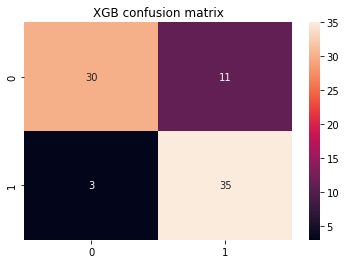

In [19]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

params = {
    "learning_rate": [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2 , 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7],
    "base_score": [0.1, 0.3, 0.5, 0.7, 0.9],
    "n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
}

xgb_random=RandomizedSearchCV(xgb,
                            param_distributions=params,
                            scoring='f1',
                            n_jobs=-1,
                            cv=5,
                            verbose=1,
                            random_state = 42)


xgb_random.fit(X_train,y_train)
print('The best parameters are: ', xgb_random.best_params_)

new_xgb = XGBClassifier(n_estimators = xgb_random.best_params_['n_estimators'], 
                                base_score = xgb_random.best_params_['base_score'],
                                colsample_bytree = xgb_random.best_params_['colsample_bytree'],
                                gamma = xgb_random.best_params_['gamma'],
                                min_child_weight = xgb_random.best_params_['min_child_weight'],
                                max_depth = xgb_random.best_params_['max_depth'],
                                learning_rate = xgb_random.best_params_['learning_rate'])

new_xgb.fit(X_train, y_train)
y_pred = new_xgb.predict(X_test)
print("XGB AUC: ", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[0, 1]))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)
plt.title('XGB confusion matrix')
plt.show()

In [20]:
xgb_predications = new_xgb.predict(X)
grand_data['XGB_pred'] = xgb_predications
grand_data

,0,1,2,3,4,5,6,7,8,9,...,13102,13103,13104,13105,13106,13107,status,time,RF_pred,XGB_pred
NKI_4,-0.050,-0.384,0.087,0.067,-0.533,0.033,-0.093,0.049,0.232,-0.127333,...,0.158,-0.207,0.043,0.083,-0.233,0.096,0,13.005479,0,0
NKI_6,0.125,-0.314,0.491,-0.027,0.695,0.037,0.137,0.106,-0.083,0.040667,...,-0.048,0.290,0.048,0.018,0.128,-0.055,0,11.164384,0,0
NKI_7,0.426,0.053,-0.771,-0.019,0.089,-0.131,0.056,0.036,-0.082,-0.023333,...,0.059,-0.135,0.072,0.129,0.172,0.088,0,10.145205,0,0
NKI_8,-0.016,-0.035,-0.507,-0.129,0.093,0.019,-0.046,0.111,-0.103,-0.088667,...,-0.008,-0.061,0.050,0.008,-0.151,-0.184,0,8.808219,0,1
NKI_9,0.307,-0.169,-0.537,0.098,0.166,-0.204,0.218,0.252,-0.113,-0.123333,...,0.181,0.229,0.145,0.059,-0.099,-0.144,0,10.301370,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NKI_398,-0.092,-0.455,-0.693,-0.282,-0.619,-0.024,-0.023,0.202,-0.035,-0.034333,...,-0.694,-0.211,-0.166,-0.401,-0.219,-0.250,0,8.430137,0,0
NKI_401,0.054,-0.664,0.112,-0.112,0.597,-0.364,0.135,0.319,-0.137,0.232333,...,0.281,-0.042,0.329,-0.094,-0.120,-0.412,1,1.528767,1,1
NKI_402,-0.067,-0.173,-0.788,0.103,0.305,-0.010,-0.100,0.323,0.029,0.021333,...,-0.003,0.211,0.449,0.251,-0.356,-0.158,0,7.383562,0,0
NKI_403,0.345,-0.091,0.174,-0.041,-0.238,-0.436,0.055,0.241,-0.256,-0.162000,...,0.183,0.027,0.233,-0.381,-0.103,-0.199,0,6.758904,0,0


# DNN

In [21]:
y_dummy = pd.get_dummies(y_resampled).values
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_dummy, shuffle=True, test_size = 0.2, random_state=100)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True, test_size = 0.2, random_state=100)

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_auc_score
import os

def build_dnn_model1():
    model = Sequential(name='sequential_1')
    model.add(Dense(name='pre_x_input',units=40,activation='linear',use_bias=True,kernel_regularizer=regularizers.l1_l2(l1=0, l2=0.0010000000474974513),input_shape=(13108,)))
    model.add(Activation(name='activation_1',dtype='float32',activation='relu'))
    model.add(Dense(name='pre_x_h1',units=40,activation='linear',use_bias=True,kernel_regularizer=regularizers.l1_l2(l1=0, l2=0.0010000000474974513),))
    model.add(Activation(name='activation_2',dtype='float32',activation='relu'))
    model.add(Dense(name='pre_x_h2',units=40,activation='linear',use_bias=True,kernel_regularizer=regularizers.l1_l2(l1=0, l2=0.0010000000474974513),))
    model.add(Activation(name='activation_3',dtype='float32',activation='relu'))
    model.add(Dense(name='pre_x_h3',units=40,activation='linear',use_bias=True,kernel_regularizer=regularizers.l1_l2(l1=0, l2=0.0010000000474974513),))
    model.add(Activation(name='activation_4',dtype='float32',activation='relu'))
    model.add(Dense(name='merge_h1',units=58,activation='linear',use_bias=True,kernel_regularizer=regularizers.l1_l2(l1=0, l2=0.0010000000474974513),))
    model.add(Activation(name='activation_5',dtype='float32',activation='relu'))
    model.add(Dense(name='merge_h2',units=32,activation='linear',use_bias=True,kernel_regularizer=regularizers.l1_l2(l1=0, l2=0.0010000000474974513),))
    model.add(Activation(name='activation_6',dtype='float32',activation='relu'))
    model.add(Dense(name='merge_h3',units=32,activation='linear',use_bias=True,kernel_regularizer=regularizers.l1_l2(l1=0, l2=0.0010000000474974513),))
    model.add(Activation(name='activation_7',dtype='float32',activation='relu'))
    model.add(Dense(name='x_out',units=2,activation='softmax',use_bias=True,))

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

    return model

dnn_model1=build_dnn_model1()
dnn_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pre_x_input (Dense)         (None, 40)                524360    
                                                                 
 activation_1 (Activation)   (None, 40)                0         
                                                                 
 pre_x_h1 (Dense)            (None, 40)                1640      
                                                                 
 activation_2 (Activation)   (None, 40)                0         
                                                                 
 pre_x_h2 (Dense)            (None, 40)                1640      
                                                                 
 activation_3 (Activation)   (None, 40)                0         
                                                                 
 pre_x_h3 (Dense)            (None, 40)               

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix

def calculate_youden_index(label, pred): 
  confusion = confusion_matrix(label,pred)
  TP = confusion[1, 1]
  TN = confusion[0, 0]
  FP = confusion[0, 1]
  FN = confusion[1, 0]
  se = TP / float(TP+FN)
  sp = TN / float(TN+FP)
  youden_index = se + sp -1
  return youden_index

def get_best_t(label, pred):
  best_youden_index=0
  best_t=0
  for t in np.arange(0,1,0.01):
    dnn_predications_1d = np.zeros(pred.shape[0])
    idx = np.where(pred[:,0]<t)
    dnn_predications_1d[idx]=1
    dnn_predications_1d = pd.get_dummies(dnn_predications_1d).values
    dnn_predications_1d = np.argmax(dnn_predications_1d,axis=1)
    youden_index = calculate_youden_index(label,dnn_predications_1d)
    if youden_index>best_youden_index:
      best_youden_index = youden_index
      best_pred = dnn_predications_1d
      best_t=t

  return best_t,best_youden_index,best_pred

for cv in range(1,6):
  X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_dummy, shuffle=True, test_size = 0.2)
  dnn_model1 = build_dnn_model1()
  checkpoint_callback = ModelCheckpoint(filepath='best_dnn_model1.hdf5',monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')
  dnn_history1 = dnn_model1.fit(X_train,y_train,epochs = 100, validation_split = 0.2, verbose=0,callbacks=[checkpoint_callback])
  dnn_model1.load_weights('best_dnn_model1.hdf5')
  dnn_predications1=dnn_model1.predict(X_test)
  auc_no_reclassification = roc_auc_score(y_test.argmax(axis=1),dnn_predications1.argmax(axis=1))
  print('\n********************************')
  print('cv=',cv)
  print('before reclassification auc:',auc_no_reclassification)
  print(classification_report(y_test.argmax(axis=1),dnn_predications1.argmax(axis=1)))
  best_t,best_youden_index,best_dnn_predications = get_best_t(y_test.argmax(axis=1),dnn_predications1)
  print('the best t and youden index is:',best_t,'and',best_youden_index,'\n')
  auc_with_reclassification = roc_auc_score(y_test.argmax(axis=1),best_dnn_predications)
  print('after reclassification auc:',auc_with_reclassification)
  print(classification_report(y_test.argmax(axis=1),best_dnn_predications))
  print('********************************\n')
  



Epoch 1: val_accuracy improved from -inf to 0.49206, saving model to best_dnn_model1.hdf5

Epoch 2: val_accuracy improved from 0.49206 to 0.58730, saving model to best_dnn_model1.hdf5

Epoch 3: val_accuracy did not improve from 0.58730

Epoch 4: val_accuracy improved from 0.58730 to 0.73016, saving model to best_dnn_model1.hdf5

Epoch 5: val_accuracy did not improve from 0.73016

Epoch 6: val_accuracy improved from 0.73016 to 0.82540, saving model to best_dnn_model1.hdf5

Epoch 7: val_accuracy did not improve from 0.82540

Epoch 8: val_accuracy did not improve from 0.82540

Epoch 9: val_accuracy did not improve from 0.82540

Epoch 10: val_accuracy did not improve from 0.82540

Epoch 11: val_accuracy did not improve from 0.82540

Epoch 12: val_accuracy did not improve from 0.82540

Epoch 13: val_accuracy did not improve from 0.82540

Epoch 14: val_accuracy did not improve from 0.82540

Epoch 15: val_accuracy did not improve from 0.82540

Epoch 16: val_accuracy did not improve from 0.82

## reclassification

before reclassification auc: 0.9116311115647646
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       194
           1       0.84      0.91      0.88       101

    accuracy                           0.91       295
   macro avg       0.90      0.91      0.90       295
weighted avg       0.91      0.91      0.91       295



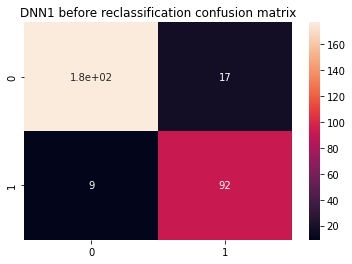

the best cutoff and youden index is: 0.02 and 0.8494437072573238 

after reclassification auc: 0.9247218536286618
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       194
           1       0.90      0.90      0.90       101

    accuracy                           0.93       295
   macro avg       0.92      0.92      0.92       295
weighted avg       0.93      0.93      0.93       295



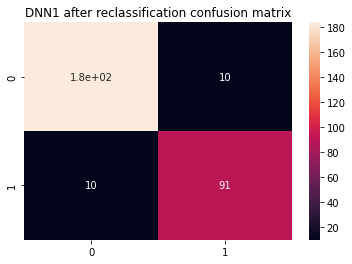

,0,1,2,3,4,5,6,7,8,9,...,13103,13104,13105,13106,13107,status,time,RF_pred,XGB_pred,DNN_pred1
NKI_4,-0.050,-0.384,0.087,0.067,-0.533,0.033,-0.093,0.049,0.232,-0.127333,...,-0.207,0.043,0.083,-0.233,0.096,0,13.005479,0,0,0
NKI_6,0.125,-0.314,0.491,-0.027,0.695,0.037,0.137,0.106,-0.083,0.040667,...,0.290,0.048,0.018,0.128,-0.055,0,11.164384,0,0,0
NKI_7,0.426,0.053,-0.771,-0.019,0.089,-0.131,0.056,0.036,-0.082,-0.023333,...,-0.135,0.072,0.129,0.172,0.088,0,10.145205,0,0,0
NKI_8,-0.016,-0.035,-0.507,-0.129,0.093,0.019,-0.046,0.111,-0.103,-0.088667,...,-0.061,0.050,0.008,-0.151,-0.184,0,8.808219,0,1,0
NKI_9,0.307,-0.169,-0.537,0.098,0.166,-0.204,0.218,0.252,-0.113,-0.123333,...,0.229,0.145,0.059,-0.099,-0.144,0,10.301370,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NKI_398,-0.092,-0.455,-0.693,-0.282,-0.619,-0.024,-0.023,0.202,-0.035,-0.034333,...,-0.211,-0.166,-0.401,-0.219,-0.250,0,8.430137,0,0,0
NKI_401,0.054,-0.664,0.112,-0.112,0.597,-0.364,0.135,0.319,-0.137,0.232333,...,-0.042,0.329,-0.094,-0.120,-0.412,1,1.528767,1,1,1
NKI_402,-0.067,-0.173,-0.788,0.103,0.305,-0.010,-0.100,0.323,0.029,0.021333,...,0.211,0.449,0.251,-0.356,-0.158,0,7.383562,0,0,0
NKI_403,0.345,-0.091,0.174,-0.041,-0.238,-0.436,0.055,0.241,-0.256,-0.162000,...,0.027,0.233,-0.381,-0.103,-0.199,0,6.758904,0,0,0


In [24]:
dnn_predications1=dnn_model1.predict(X)
auc_no_reclassification = roc_auc_score(y,dnn_predications1.argmax(axis=1))
print('before reclassification auc:',auc_no_reclassification)
print(classification_report(y,dnn_predications1.argmax(axis=1)))
sns.heatmap(confusion_matrix(y, dnn_predications1.argmax(axis=1)),annot=True)
plt.title('DNN1 before reclassification confusion matrix')
plt.show()
best_t,best_youden_index,best_dnn_predications = get_best_t(y,dnn_predications1)
print('the best cutoff and youden index is:',best_t,'and',best_youden_index,'\n')
auc_with_reclassification = roc_auc_score(y,best_dnn_predications)
print('after reclassification auc:',auc_with_reclassification)
print(classification_report(y,best_dnn_predications))
sns.heatmap(confusion_matrix(y, best_dnn_predications),annot=True)
plt.title('DNN1 after reclassification confusion matrix')
plt.show()
grand_data['DNN_pred1'] = best_dnn_predications
grand_data

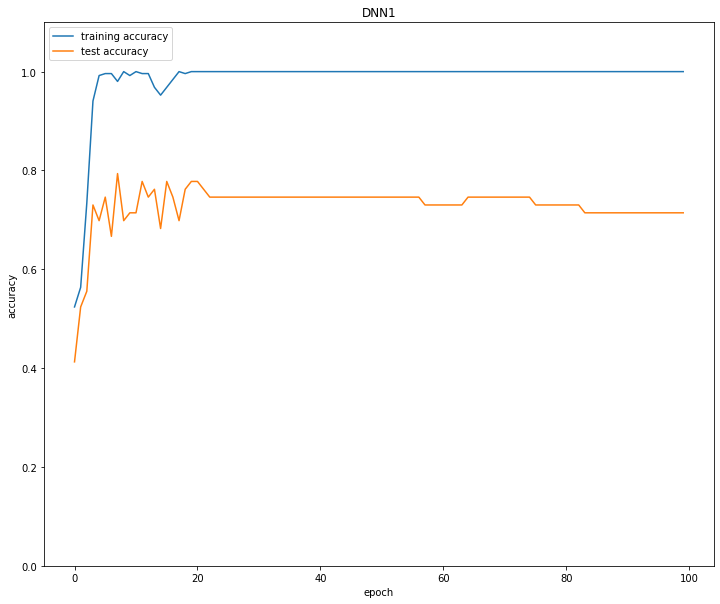

In [25]:
plt.figure(figsize=(12,10))
plt.plot(dnn_history1.history["accuracy"],label='training accuracy')
plt.plot(dnn_history1.history["val_accuracy"],label='test accuracy')
plt.title('DNN1')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.ylim(0,1.1)
plt.show()

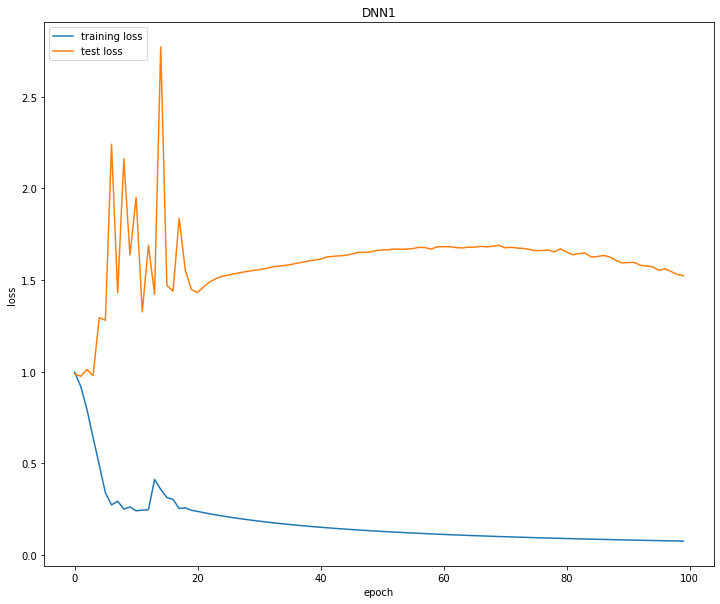

In [26]:
plt.figure(figsize=(12,10))
plt.plot(dnn_history1.history["loss"],label='training loss')
plt.plot(dnn_history1.history["val_loss"],label='test loss')
plt.title('DNN1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

# DNN2

In [27]:
from keras.models import Sequential, load_model, Model
from keras.layers import Dense,Activation
from keras import regularizers
from keras.callbacks import ModelCheckpoint

def build_dnn_model2():
  model = Sequential()
  model.add(Dense(128, activation='relu', use_bias=True, input_shape=(13108,)))
  model.add(Dense(128, activation='relu', use_bias=True))
  model.add(Dense(128, activation='relu', use_bias=True))
  model.add(Dense(64, activation='relu', use_bias=True))
  model.add(Dense(64, activation='relu', use_bias=True))
  model.add(Dense(64, activation='relu', use_bias=True))
  model.add(Dense(32, activation='relu', use_bias=True))
  model.add(Dense(32, activation='relu', use_bias=True))
  model.add(Dense(32, activation='relu', use_bias=True))
  model.add(Dense(2, activation='softmax'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  
  return model

dnn_model2=build_dnn_model2()
dnn_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1677952   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [28]:
for cv in range(1,6):
  X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_dummy, shuffle=True, test_size = 0.2)
  dnn_model2=build_dnn_model2()
  checkpoint_callback = ModelCheckpoint(filepath='best_dnn_model2.hdf5',monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')
  dnn_history2 = dnn_model2.fit(X_train,y_train,epochs = 100, validation_split = 0.2, verbose=0,callbacks=[checkpoint_callback])
  dnn_model2.load_weights('best_dnn_model2.hdf5')
  dnn_predications2=dnn_model2.predict(X_test)
  auc_no_reclassification = roc_auc_score(y_test.argmax(axis=1),dnn_predications2.argmax(axis=1))
  print('\n********************************')
  print('cv=',cv)
  print('before reclassification auc:',auc_no_reclassification)
  print(classification_report(y_test.argmax(axis=1),dnn_predications2.argmax(axis=1)))
  best_t,best_youden_index,best_dnn_predications = get_best_t(y_test.argmax(axis=1),dnn_predications2)
  print('the best t and youden index is:',best_t,'and',best_youden_index,'\n')
  auc_with_reclassification = roc_auc_score(y_test.argmax(axis=1),best_dnn_predications)
  print('after reclassification auc:',auc_with_reclassification)
  print(classification_report(y_test.argmax(axis=1),best_dnn_predications))
  print('********************************\n')
  


Epoch 1: val_accuracy improved from -inf to 0.44444, saving model to best_dnn_model2.hdf5

Epoch 2: val_accuracy improved from 0.44444 to 0.60317, saving model to best_dnn_model2.hdf5

Epoch 3: val_accuracy improved from 0.60317 to 0.76190, saving model to best_dnn_model2.hdf5

Epoch 4: val_accuracy improved from 0.76190 to 0.77778, saving model to best_dnn_model2.hdf5

Epoch 5: val_accuracy did not improve from 0.77778

Epoch 6: val_accuracy improved from 0.77778 to 0.82540, saving model to best_dnn_model2.hdf5

Epoch 7: val_accuracy did not improve from 0.82540

Epoch 8: val_accuracy did not improve from 0.82540

Epoch 9: val_accuracy did not improve from 0.82540

Epoch 10: val_accuracy did not improve from 0.82540

Epoch 11: val_accuracy did not improve from 0.82540

Epoch 12: val_accuracy did not improve from 0.82540

Epoch 13: val_accuracy did not improve from 0.82540

Epoch 14: val_accuracy did not improve from 0.82540

Epoch 15: val_accuracy did not improve from 0.82540

Epoch 

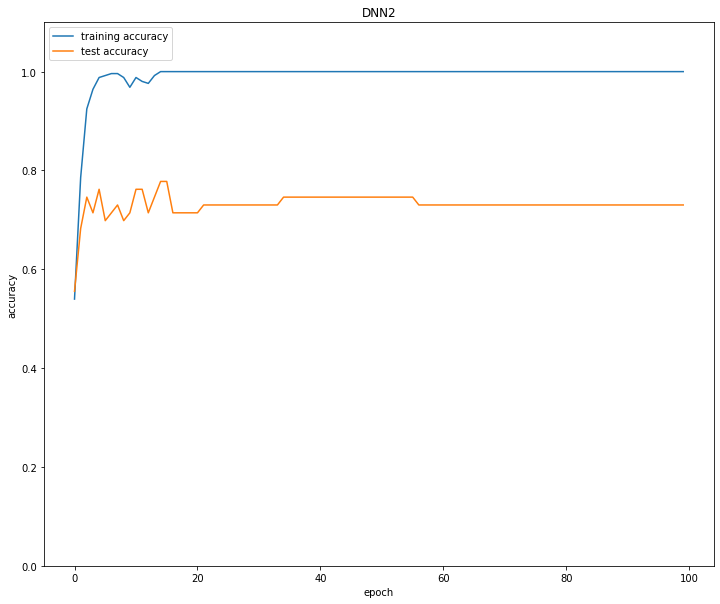

In [29]:
plt.figure(figsize=(12,10))
plt.plot(dnn_history2.history["accuracy"],label='training accuracy')
plt.plot(dnn_history2.history["val_accuracy"],label='test accuracy')
plt.title('DNN2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.ylim(0,1.1)
plt.show()

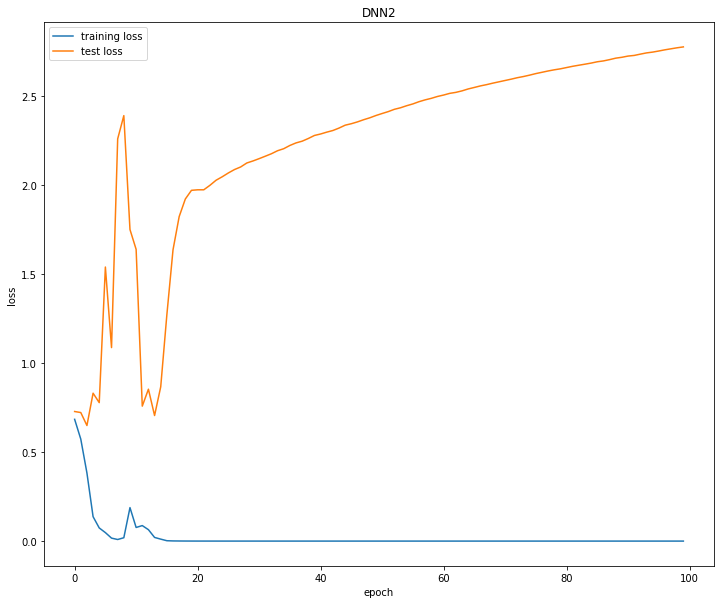

In [30]:
plt.figure(figsize=(12,10))
plt.plot(dnn_history2.history["loss"],label='training loss')
plt.plot(dnn_history2.history["val_loss"],label='test loss')
plt.title('DNN2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

before reclassification auc: 0.8965754822904971
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       194
           1       0.83      0.89      0.86       101

    accuracy                           0.90       295
   macro avg       0.88      0.90      0.89       295
weighted avg       0.90      0.90      0.90       295



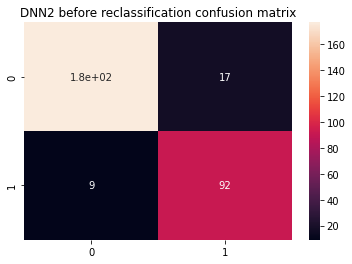

the best t and youden index is: 0.27 and 0.7983056037562519 

after reclassification auc: 0.8991528018781259
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       194
           1       0.83      0.89      0.86       101

    accuracy                           0.90       295
   macro avg       0.89      0.90      0.89       295
weighted avg       0.90      0.90      0.90       295



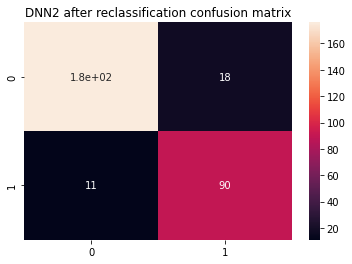

,0,1,2,3,4,5,6,7,8,9,...,13104,13105,13106,13107,status,time,RF_pred,XGB_pred,DNN_pred1,DNN_pred2
NKI_4,-0.050,-0.384,0.087,0.067,-0.533,0.033,-0.093,0.049,0.232,-0.127333,...,0.043,0.083,-0.233,0.096,0,13.005479,0,0,0,0
NKI_6,0.125,-0.314,0.491,-0.027,0.695,0.037,0.137,0.106,-0.083,0.040667,...,0.048,0.018,0.128,-0.055,0,11.164384,0,0,0,0
NKI_7,0.426,0.053,-0.771,-0.019,0.089,-0.131,0.056,0.036,-0.082,-0.023333,...,0.072,0.129,0.172,0.088,0,10.145205,0,0,0,0
NKI_8,-0.016,-0.035,-0.507,-0.129,0.093,0.019,-0.046,0.111,-0.103,-0.088667,...,0.050,0.008,-0.151,-0.184,0,8.808219,0,1,0,0
NKI_9,0.307,-0.169,-0.537,0.098,0.166,-0.204,0.218,0.252,-0.113,-0.123333,...,0.145,0.059,-0.099,-0.144,0,10.301370,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NKI_398,-0.092,-0.455,-0.693,-0.282,-0.619,-0.024,-0.023,0.202,-0.035,-0.034333,...,-0.166,-0.401,-0.219,-0.250,0,8.430137,0,0,0,0
NKI_401,0.054,-0.664,0.112,-0.112,0.597,-0.364,0.135,0.319,-0.137,0.232333,...,0.329,-0.094,-0.120,-0.412,1,1.528767,1,1,1,1
NKI_402,-0.067,-0.173,-0.788,0.103,0.305,-0.010,-0.100,0.323,0.029,0.021333,...,0.449,0.251,-0.356,-0.158,0,7.383562,0,0,0,1
NKI_403,0.345,-0.091,0.174,-0.041,-0.238,-0.436,0.055,0.241,-0.256,-0.162000,...,0.233,-0.381,-0.103,-0.199,0,6.758904,0,0,0,0


In [31]:
dnn_predications2=dnn_model2.predict(X)
auc_no_reclassification = roc_auc_score(y,dnn_predications2.argmax(axis=1))
print('before reclassification auc:',auc_no_reclassification)
print(classification_report(y,dnn_predications2.argmax(axis=1)))
sns.heatmap(confusion_matrix(y, dnn_predications1.argmax(axis=1)),annot=True)
plt.title('DNN2 before reclassification confusion matrix')
plt.show()
best_t,best_youden_index,best_dnn_predications = get_best_t(y,dnn_predications2)
print('the best t and youden index is:',best_t,'and',best_youden_index,'\n')
auc_with_reclassification = roc_auc_score(y,best_dnn_predications)
print('after reclassification auc:',auc_with_reclassification)
print(classification_report(y,best_dnn_predications))
sns.heatmap(confusion_matrix(y, best_dnn_predications),annot=True)
plt.title('DNN2 after reclassification confusion matrix')
plt.show()
grand_data['DNN_pred2'] = best_dnn_predications
grand_data

# CNN

In [32]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten

def build_cnn_model():
  model = Sequential()
  model.add(Input(shape=(13108, 1), name="input"))
  model.add(Conv1D(filters=32, kernel_size=3, activation="relu"))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Conv1D(filters=64, kernel_size=3, activation="relu"))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', use_bias=True))
  model.add(Dense(64, activation='relu', use_bias=True))
  model.add(Dense(32, activation='relu', use_bias=True))
  model.add(Dense(2, activation='softmax'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model

cnn_model = build_cnn_model()
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13106, 32)         128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6553, 32)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 6551, 64)          6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3275, 64)         0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 209600)            0         
                                                                 
 dense_60 (Dense)            (None, 128)              

In [33]:
for cv in range(1,6):
  X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_dummy, shuffle=True, test_size = 0.2)
  cnn_model = build_cnn_model()
  checkpoint_callback = ModelCheckpoint(filepath='best_cnn_model.hdf5',monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')
  cnn_history = cnn_model.fit(X_train,y_train,epochs = 100, validation_split = 0.2, verbose=0,callbacks=[checkpoint_callback])
  cnn_model.load_weights('best_cnn_model.hdf5')
  cnn_predications=cnn_model.predict(X_test)
  auc_no_reclassification = roc_auc_score(y_test.argmax(axis=1),cnn_predications.argmax(axis=1))
  print('\n********************************')
  print('cv=',cv)
  print('before reclassification auc:',auc_no_reclassification)
  print(classification_report(y_test.argmax(axis=1),cnn_predications.argmax(axis=1)))
  best_t,best_youden_index,best_dnn_predications = get_best_t(y_test.argmax(axis=1),cnn_predications)
  print('the best t and youden index is:',best_t,'and',best_youden_index,'\n')
  auc_with_reclassification = roc_auc_score(y_test.argmax(axis=1),best_dnn_predications)
  print('after reclassification auc:',auc_with_reclassification)
  print(classification_report(y_test.argmax(axis=1),best_dnn_predications))
  print('********************************\n')


Epoch 1: val_accuracy improved from -inf to 0.57143, saving model to best_cnn_model.hdf5

Epoch 2: val_accuracy improved from 0.57143 to 0.73016, saving model to best_cnn_model.hdf5

Epoch 3: val_accuracy improved from 0.73016 to 0.74603, saving model to best_cnn_model.hdf5

Epoch 4: val_accuracy improved from 0.74603 to 0.77778, saving model to best_cnn_model.hdf5

Epoch 5: val_accuracy improved from 0.77778 to 0.79365, saving model to best_cnn_model.hdf5

Epoch 6: val_accuracy did not improve from 0.79365

Epoch 7: val_accuracy did not improve from 0.79365

Epoch 8: val_accuracy improved from 0.79365 to 0.80952, saving model to best_cnn_model.hdf5

Epoch 9: val_accuracy did not improve from 0.80952

Epoch 10: val_accuracy did not improve from 0.80952

Epoch 11: val_accuracy did not improve from 0.80952

Epoch 12: val_accuracy did not improve from 0.80952

Epoch 13: val_accuracy did not improve from 0.80952

Epoch 14: val_accuracy did not improve from 0.80952

Epoch 15: val_accuracy 

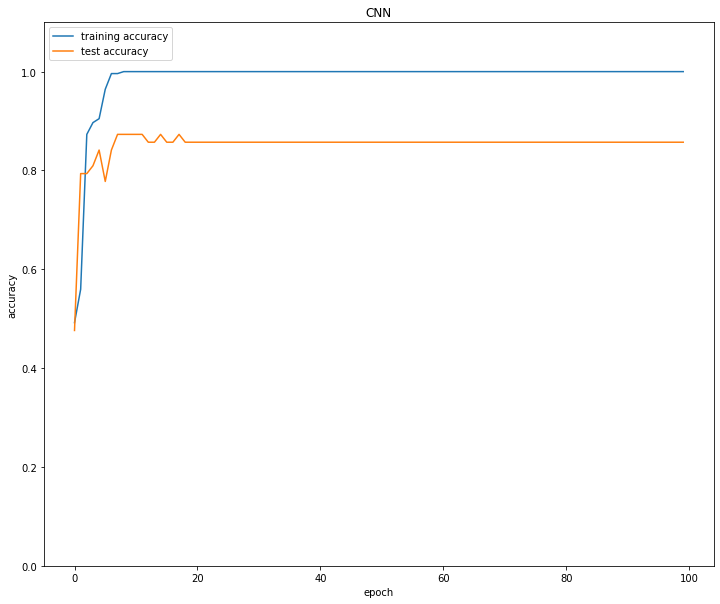

In [34]:
plt.figure(figsize=(12,10))
plt.plot(cnn_history.history["accuracy"],label='training accuracy')
plt.plot(cnn_history.history["val_accuracy"],label='test accuracy')
plt.title('CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.ylim(0,1.1)
plt.show()

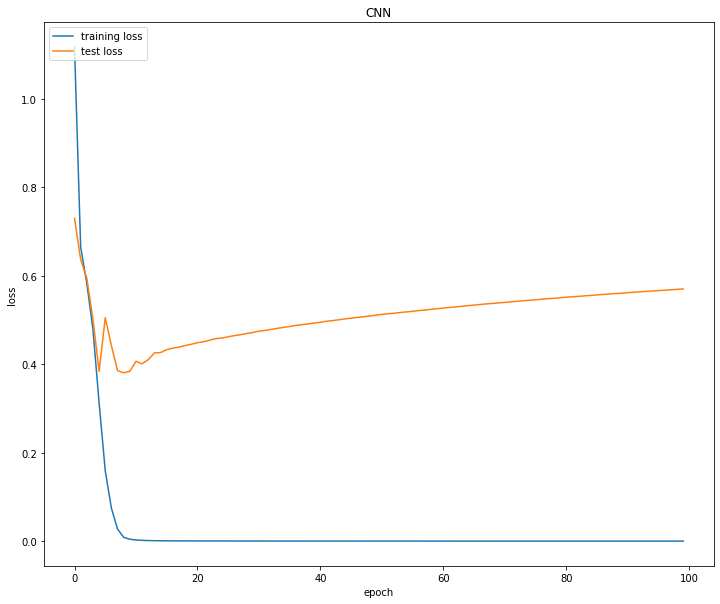

In [35]:
plt.figure(figsize=(12,10))
plt.plot(cnn_history.history["loss"],label='training loss')
plt.plot(cnn_history.history["val_loss"],label='test loss')
plt.title('CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

before reclassification auc: 0.9193630703276513
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       194
           1       0.87      0.91      0.89       101

    accuracy                           0.92       295
   macro avg       0.91      0.92      0.91       295
weighted avg       0.92      0.92      0.92       295



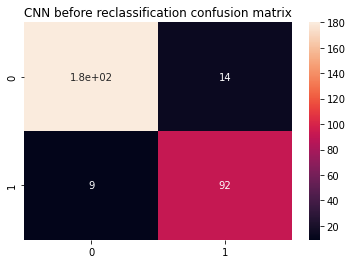

the best t and youden index is: 0.66 and 0.8632744717770746 

after reclassification auc: 0.9316372358885373
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       194
           1       0.86      0.94      0.90       101

    accuracy                           0.93       295
   macro avg       0.92      0.93      0.92       295
weighted avg       0.93      0.93      0.93       295



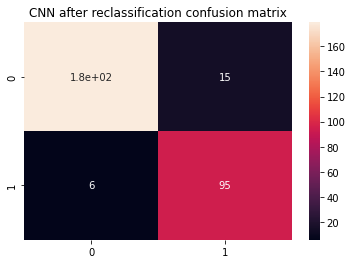

,0,1,2,3,4,5,6,7,8,9,...,13105,13106,13107,status,time,RF_pred,XGB_pred,DNN_pred1,DNN_pred2,CNN_pred
NKI_4,-0.050,-0.384,0.087,0.067,-0.533,0.033,-0.093,0.049,0.232,-0.127333,...,0.083,-0.233,0.096,0,13.005479,0,0,0,0,0
NKI_6,0.125,-0.314,0.491,-0.027,0.695,0.037,0.137,0.106,-0.083,0.040667,...,0.018,0.128,-0.055,0,11.164384,0,0,0,0,0
NKI_7,0.426,0.053,-0.771,-0.019,0.089,-0.131,0.056,0.036,-0.082,-0.023333,...,0.129,0.172,0.088,0,10.145205,0,0,0,0,0
NKI_8,-0.016,-0.035,-0.507,-0.129,0.093,0.019,-0.046,0.111,-0.103,-0.088667,...,0.008,-0.151,-0.184,0,8.808219,0,1,0,0,1
NKI_9,0.307,-0.169,-0.537,0.098,0.166,-0.204,0.218,0.252,-0.113,-0.123333,...,0.059,-0.099,-0.144,0,10.301370,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NKI_398,-0.092,-0.455,-0.693,-0.282,-0.619,-0.024,-0.023,0.202,-0.035,-0.034333,...,-0.401,-0.219,-0.250,0,8.430137,0,0,0,0,0
NKI_401,0.054,-0.664,0.112,-0.112,0.597,-0.364,0.135,0.319,-0.137,0.232333,...,-0.094,-0.120,-0.412,1,1.528767,1,1,1,1,1
NKI_402,-0.067,-0.173,-0.788,0.103,0.305,-0.010,-0.100,0.323,0.029,0.021333,...,0.251,-0.356,-0.158,0,7.383562,0,0,0,1,0
NKI_403,0.345,-0.091,0.174,-0.041,-0.238,-0.436,0.055,0.241,-0.256,-0.162000,...,-0.381,-0.103,-0.199,0,6.758904,0,0,0,0,0


In [36]:
cnn_predications=cnn_model.predict(X)
auc_no_reclassification = roc_auc_score(y,cnn_predications.argmax(axis=1))
print('before reclassification auc:',auc_no_reclassification)
print(classification_report(y,cnn_predications.argmax(axis=1)))
sns.heatmap(confusion_matrix(y, cnn_predications.argmax(axis=1)),annot=True)
plt.title('CNN before reclassification confusion matrix')
plt.show()
best_t,best_youden_index,best_cnn_predications = get_best_t(y,cnn_predications)
print('the best t and youden index is:',best_t,'and',best_youden_index,'\n')
auc_with_reclassification = roc_auc_score(y,best_cnn_predications)
print('after reclassification auc:',auc_with_reclassification)
print(classification_report(y,best_cnn_predications))
sns.heatmap(confusion_matrix(y, best_cnn_predications),annot=True)
plt.title('CNN after reclassification confusion matrix')
plt.show()
grand_data['CNN_pred'] = best_cnn_predications
grand_data

# Survival Analysis

In [37]:
! pip install lifelines

     |████████████████████████████████| 349 kB 32.1 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=fe7fbc5b0a4791cced05edb9fbeacfe44d15f1613b6b245f116132abd2c4345f
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: astor
    Found existing installation: astor 0.8.1
    Uninstalling astor-0.8.1:
      Successfully uninstalled astor-0.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires astor~=0.8.1, but you h

Text(0.5, 1.0, 'Segment Level Survival Analysis')

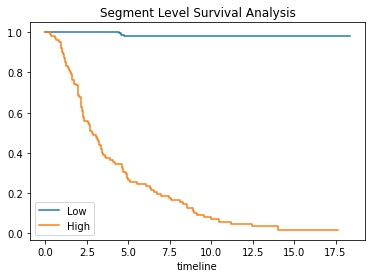

In [38]:
import lifelines

name = ['Low','High']

ax = plt.subplot(111)
group = 'Segment Level Survival Analysis'
for i in range(2):
    tmp = grand_data[grand_data['RF_pred'] == i]
    new_T = tmp['time']
    new_E = tmp['status']
    kmf = lifelines.KaplanMeierFitter().fit(new_T, new_E, alpha=0.05, label=name[i])
    kmf.plot_survival_function(ax=ax,ci_show=False)
plt.title(group)


Text(0.5, 1.0, 'Segment Level Survival Analysis')

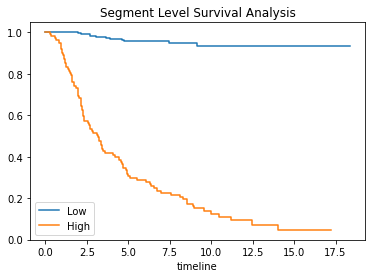

In [39]:
name = ['Low','High']

ax = plt.subplot(111)
group = 'Segment Level Survival Analysis'
for i in range(2):
    tmp = grand_data[grand_data['DNN_pred1'] == i]
    new_T = tmp['time']
    new_E = tmp['status']
    kmf = lifelines.KaplanMeierFitter().fit(new_T, new_E, alpha=0.05, label=name[i])
    kmf.plot_survival_function(ax=ax,ci_show=False)
plt.title(group)


Text(0.5, 1.0, 'Segment Level Survival Analysis')

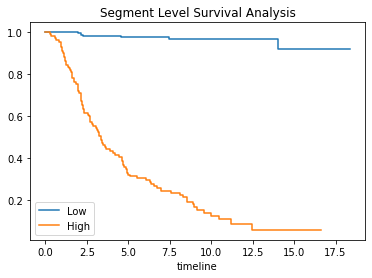

In [40]:
name = ['Low','High']

ax = plt.subplot(111)
group = 'Segment Level Survival Analysis'
for i in range(2):
    tmp = grand_data[grand_data['CNN_pred'] == i]
    new_T = tmp['time']
    new_E = tmp['status']
    kmf = lifelines.KaplanMeierFitter().fit(new_T, new_E, alpha=0.05, label=name[i])
    kmf.plot_survival_function(ax=ax,ci_show=False)
plt.title(group)

In [41]:
from lifelines import CoxPHFitter

event_data = grand_data[['time', 'status', 'RF_pred','XGB_pred', 'DNN_pred1','DNN_pred2', 'CNN_pred']]
cph = CoxPHFitter()
cph.fit(event_data, 'time', event_col = 'status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 295 total observations, 194 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 295
number of events observed = 101
   partial log-likelihood = -384.82
         time fit was run = 2022-04-27 15:05:52 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
RF_pred    17.19   2.92e+07    2768.47         -5408.91          5443.29                 0.00                  inf
XGB_pred  -14.01       0.00    2768.47         -5440.11          5412.09                 0.00                  inf
DNN_pred1   0.69       1.98       0.40            -0.09             1.47                 0.91                 4.33
DNN_pred2   0.26       1.30       0.40            -0.52             1.05                 0.59                 2.84
CNN_pred    1.33       3.79       0.56             0.23             2.43                 1.26                11.36

            cmp to     z    p   -log2(p)
covariate                               
RF_pred       0.00  0.01 1.00       0.01
XGB_pred      0.00 -0.01 1.00       0.01
DNN_pred1     0.00  1.72 0.09       3.55
DNN_pred2     0.00  0.66 0.51       0.97
CNN_pred      0.00  2.38 0.02       5.85
---
Concordance = 0.89
Partial AIC = 779.65
log-likelihood ratio test = 299.45 on 5 df
-log2(p) of ll-ratio test = 205.57